In [1]:
# First we go one back in our directory to access the folder with our functions
%cd ..

# Now we import the functions from the features folder
# This is the functions we have created to generate features for electricity prices and weather measures
from features import electricity_prices, weather_measures, calendar

# We go back into the notebooks folder
%cd notebooks

/Users/tobiasmjensen/Documents/aau_bds/m5_data-engineering-and-mlops/exam_assigment/MLOPs-Assignment-
/Users/tobiasmjensen/Documents/aau_bds/m5_data-engineering-and-mlops/exam_assigment/MLOPs-Assignment-/notebooks


In [2]:
# Importing the packages for the needed libraries for the Jupyter notebook
import pandas as pd
import requests
from datetime import datetime, timedelta

# Ignore warnings
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [3]:
# Fetching historical electricity prices for area DK1 from January 1, 2022
# Note: The end date is currently left out to retrieve data up to the present date of yesterday 
# Today is not included in the data as it is not historical data
electricity_df = electricity_prices.electricity_prices(
    historical=True, 
    area=["DK1"], 
    start='2022-01-01', 
    #end='2023-12-31'
)

In [4]:
# Fetching historical forecast of renewable energy data for area DK1 from January 1, 2022
# Note: The end date is currently left out to retrieve data up to the present date of yesterday 
# Today is not included in the data as it is not historical data
forecast_renewable_energy_df = electricity_prices.forecast_renewable_energy(
    historical=True, 
    area = ["DK1"],
    start= '2022-01-01', 
    #end='2023-12-31'
)

In [5]:
# Fetching historical weather measurements from January 1, 2022
# Note: The end date is currently left out to retrieve data up to the present date of yesterday 
# Today is not included in the data as it is not historical data
historical_weather_df = weather_measures.historical_weather_measures(
    historical=True, 
    start = '2022-01-01', 
    #end = '2023-12-31'
)

In [6]:
# Fetching weather forecast measures for the next 5 days
weather_forecast_df = weather_measures.forecast_weather_measures(
    forecast_length=5
)

In [7]:
weather = pd.concat([historical_weather_df, weather_forecast_df])


In [8]:
# Assuming 'timestamp' is the common column in both DataFrames
merged_df = pd.merge(electricity_df, weather, on='timestamp', how='right')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20544 entries, 0 to 20543
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   timestamp             20544 non-null  int64         
 1   datetime_x            20421 non-null  datetime64[ns]
 2   date_x                20421 non-null  object        
 3   hour_x                20421 non-null  float64       
 4   dk1_spotpricedkk_kwh  20421 non-null  float64       
 5   datetime_y            20544 non-null  datetime64[ns]
 6   date_y                20544 non-null  object        
 7   hour_y                20544 non-null  int64         
 8   temperature_2m        20544 non-null  float64       
 9   relative_humidity_2m  20544 non-null  float64       
 10  precipitation         20544 non-null  float64       
 11  rain                  20544 non-null  float64       
 12  snowfall              20544 non-null  float64       
 13  weather_code    

In [9]:
merged_df = merged_df.drop(['datetime_x', 'date_x', 'hour_x'], axis=1)
merged_df = merged_df.rename(columns={"datetime_y": "datetime", "date_y": "date", "hour_y": "hour"})

merged_df.tail(1)

,timestamp,dk1_spotpricedkk_kwh,datetime,date,hour,temperature_2m,relative_humidity_2m,precipitation,rain,snowfall,weather_code,cloud_cover,wind_speed_10m,wind_gusts_10m
20543,1715036400000,NaN,2024-05-06 23:00:00,2024-05-06,23,9.1,84.0,0.6,0.6,0.0,3.0,100.0,21.3,40.3


In [10]:
calender_df = calendar.get_calendar()

In [11]:
merged_df = pd.merge(merged_df, calender_df, left_on='date', right_on='date', how='inner')

# # Drop columns 'time_x' and 'date_x'
# merged_df = merged_df.drop(['date'], axis=1)

# Display the merged DataFrame
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20544 entries, 0 to 20543
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   timestamp             20544 non-null  int64         
 1   dk1_spotpricedkk_kwh  20421 non-null  float64       
 2   datetime              20544 non-null  datetime64[ns]
 3   date                  20544 non-null  object        
 4   hour                  20544 non-null  int64         
 5   temperature_2m        20544 non-null  float64       
 6   relative_humidity_2m  20544 non-null  float64       
 7   precipitation         20544 non-null  float64       
 8   rain                  20544 non-null  float64       
 9   snowfall              20544 non-null  float64       
 10  weather_code          20544 non-null  float64       
 11  cloud_cover           20544 non-null  float64       
 12  wind_speed_10m        20544 non-null  float64       
 13  wind_gusts_10m  

In [12]:
merged_df

,timestamp,dk1_spotpricedkk_kwh,datetime,date,hour,temperature_2m,relative_humidity_2m,precipitation,rain,snowfall,weather_code,cloud_cover,wind_speed_10m,wind_gusts_10m,dayofweek,day,month,year,holiday
0,1640995200000,0.37220,2022-01-01 00:00:00,2022-01-01,0,6.7,100.0,0.0,0.0,0.0,3.0,100.0,16.2,36.0,5,1,1,2022,1
1,1640998800000,0.30735,2022-01-01 01:00:00,2022-01-01,1,6.6,100.0,0.0,0.0,0.0,3.0,100.0,16.2,30.2,5,1,1,2022,1
2,1641002400000,0.32141,2022-01-01 02:00:00,2022-01-01,2,6.7,99.0,0.0,0.0,0.0,3.0,100.0,15.5,30.6,5,1,1,2022,1
3,1641006000000,0.33806,2022-01-01 03:00:00,2022-01-01,3,6.7,100.0,0.0,0.0,0.0,3.0,100.0,12.7,28.8,5,1,1,2022,1
4,1641009600000,0.28013,2022-01-01 04:00:00,2022-01-01,4,6.7,99.0,0.0,0.0,0.0,3.0,100.0,10.6,23.8,5,1,1,2022,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20539,1715022000000,NaN,2024-05-06 19:00:00,2024-05-06,19,10.7,91.0,1.4,1.4,0.0,61.0,100.0,16.6,32.0,0,6,5,2024,0
20540,1715025600000,NaN,2024-05-06 20:00:00,2024-05-06,20,10.1,90.0,1.4,1.4,0.0,61.0,100.0,19.5,37.1,0,6,5,2024,0
20541,1715029200000,NaN,2024-05-06 21:00:00,2024-05-06,21,9.5,88.0,1.4,1.4,0.0,61.0,100.0,21.6,42.1,0,6,5,2024,0
20542,1715032800000,NaN,2024-05-06 22:00:00,2024-05-06,22,9.3,86.0,0.6,0.6,0.0,3.0,100.0,22.0,41.0,0,6,5,2024,0


In [13]:
merged_df.columns

Index(['timestamp', 'dk1_spotpricedkk_kwh', 'datetime', 'date', 'hour',
       'temperature_2m', 'relative_humidity_2m', 'precipitation', 'rain',
       'snowfall', 'weather_code', 'cloud_cover', 'wind_speed_10m',
       'wind_gusts_10m', 'dayofweek', 'day', 'month', 'year', 'holiday'],
      dtype='object')

In [14]:
merged_df = merged_df.drop(['timestamp', 'datetime', 'date'], axis=1)

In [15]:
merged_df.head()

,dk1_spotpricedkk_kwh,hour,temperature_2m,relative_humidity_2m,precipitation,rain,snowfall,weather_code,cloud_cover,wind_speed_10m,wind_gusts_10m,dayofweek,day,month,year,holiday
0,0.37220,0,6.7,100.0,0.0,0.0,0.0,3.0,100.0,16.2,36.0,5,1,1,2022,1
1,0.30735,1,6.6,100.0,0.0,0.0,0.0,3.0,100.0,16.2,30.2,5,1,1,2022,1
2,0.32141,2,6.7,99.0,0.0,0.0,0.0,3.0,100.0,15.5,30.6,5,1,1,2022,1
3,0.33806,3,6.7,100.0,0.0,0.0,0.0,3.0,100.0,12.7,28.8,5,1,1,2022,1
4,0.28013,4,6.7,99.0,0.0,0.0,0.0,3.0,100.0,10.6,23.8,5,1,1,2022,1


In [16]:
merged_df.dropna(inplace=True)

In [17]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20421 entries, 0 to 20423
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   dk1_spotpricedkk_kwh  20421 non-null  float64
 1   hour                  20421 non-null  int64  
 2   temperature_2m        20421 non-null  float64
 3   relative_humidity_2m  20421 non-null  float64
 4   precipitation         20421 non-null  float64
 5   rain                  20421 non-null  float64
 6   snowfall              20421 non-null  float64
 7   weather_code          20421 non-null  float64
 8   cloud_cover           20421 non-null  float64
 9   wind_speed_10m        20421 non-null  float64
 10  wind_gusts_10m        20421 non-null  float64
 11  dayofweek             20421 non-null  int64  
 12  day                   20421 non-null  int64  
 13  month                 20421 non-null  int64  
 14  year                  20421 non-null  int64  
 15  holiday            

In [18]:
X = merged_df.drop('dk1_spotpricedkk_kwh', axis = 1)

In [19]:
y = merged_df['dk1_spotpricedkk_kwh']

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
X_train.head()

,hour,temperature_2m,relative_humidity_2m,precipitation,rain,snowfall,weather_code,cloud_cover,wind_speed_10m,wind_gusts_10m,dayofweek,day,month,year,holiday
20261,5,4.5,91.0,0.1,0.1,0.0,51.0,99.0,12.4,24.1,2,24,4,2024,0
13632,0,12.2,90.0,0.0,0.0,0.0,0.0,2.0,7.9,14.4,6,23,7,2023,1
8727,15,5.8,86.0,0.0,0.0,0.0,3.0,100.0,22.9,43.9,4,30,12,2022,0
15674,2,7.3,75.0,0.0,0.0,0.0,0.0,12.0,16.3,31.0,0,16,10,2023,0
17003,11,2.8,95.0,0.2,0.2,0.0,51.0,100.0,23.8,43.6,6,10,12,2023,1


In [23]:
y_train

20261    0.61048
13632    0.65056
8727     0.20799
15674    0.28730
17003    0.51950
          ...   
11286    0.77108
11966    0.00119
5391     2.17258
860      0.10487
15797    0.26222
Name: dk1_spotpricedkk_kwh, Length: 16336, dtype: float64

In [24]:
import xgboost as xgb

In [25]:
# Initialize the XGBoost regressor
model = xgb.XGBRegressor()

# Train the model on the training data
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [26]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [27]:
# Predict target values on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE) using sklearn
mse = mean_squared_error(y_test, y_pred)
print("⛳️ MSE:", mse)

# Calculate Root Mean Squared Error (RMSE) using sklearn
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("⛳️ RMSE:", rmse)

# Calculate R squared using sklearn
r2 = r2_score(y_test, y_pred)
print("⛳️ R^2:", r2)

# Calculate Mean Absolute Error (MAE) using sklearn
mae = mean_absolute_error(y_test, y_pred)
print("⛳️ MAE:", mae)

⛳️ MSE: 0.06311025641393904
⛳️ RMSE: 0.2512175479817026
⛳️ R^2: 0.9271330136007067
⛳️ MAE: 0.1700428406157706


In [28]:
import matplotlib.pyplot as plt
import numpy as np

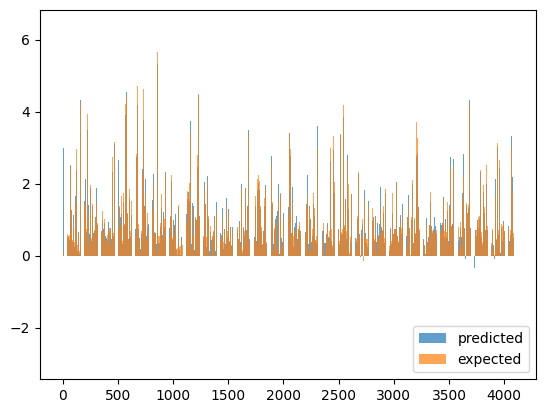

In [29]:
plt.bar(x=np.arange(len(y_pred)), height=y_pred, label='predicted', alpha=0.7)
plt.bar(x=np.arange(len(y_pred)), height=y_test, label='expected', alpha=0.7)
plt.legend()
plt.show() 

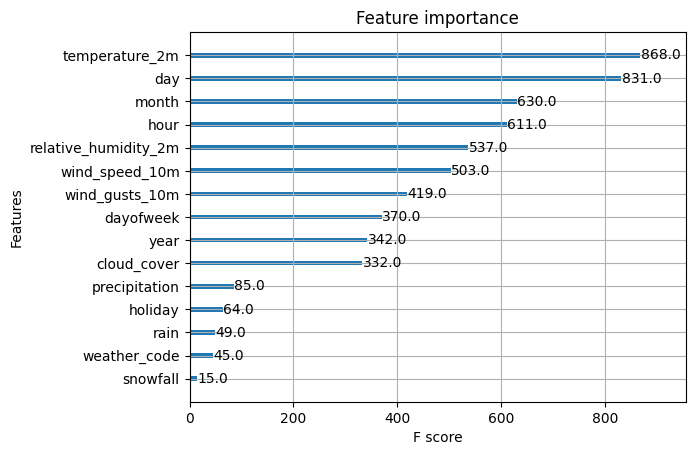

In [30]:
from xgboost import plot_importance
# Plot feature importances using the plot_importance function from XGBoost
plot_importance(
    model, 
    max_num_features=25,  # Display the top 25 most important features
)
plt.show()